# CDS503 - Machine Learning Final Project

Universiti Sains Malaysia


Group 11 - **Wine Quality Prediction Using Classification**

Members:
- JIN WENHUA
- MA RU
- GUO ZIRUI
- CHEN wenxian

## Overview

### Experiment Set 1: Comparing machine learning algorithms  
* JIN WENHUA
### Experiment Set 2: Selecting features
* MA RU
### Experiment Set 3: Ensemble learning
* CHEN WENXIAN 
### Experiment Set 4: Varying training sample size
* GUO ZIRUI


# 1. Data Preparation

In [2]:
import pandas as pd
import numpy as np



In [3]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')
#display the metadata or summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Identify each attribute and its type

The data has 4898 rows. There are 11 features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.

*  fixed_acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
*  volatile_acidity :   Volatile acidity is the gaseous acids present in wine.
* citric_acid :    It is weak organic acid, found in citrus fruits naturally.
* residual_sugar :   Amount of sugar left after fermentation.
* chlorides :   Amount of salt present in wine.
* free_sulfur_dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide 
* density 
* pH :   In wine pH is used for checking acidity
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

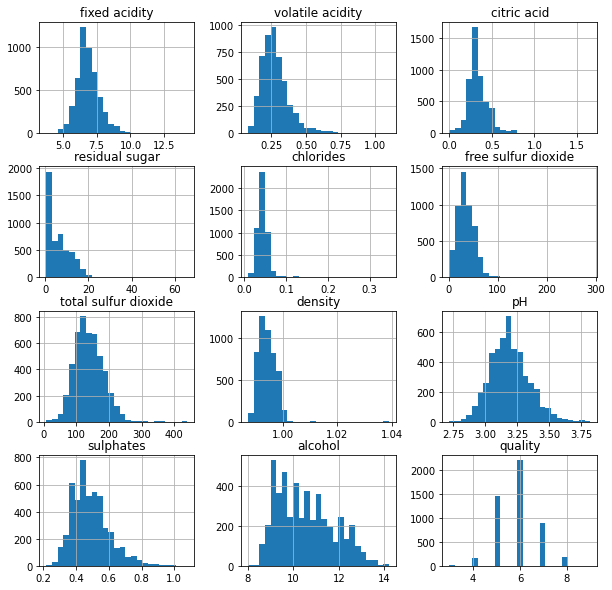

In [5]:
df.hist(bins=25,figsize=(10,10))

<AxesSubplot:>

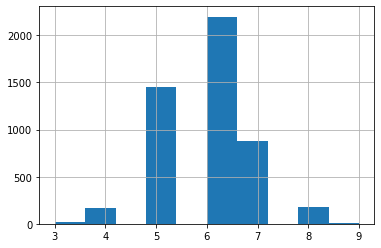

In [6]:
df['quality'].hist()

In [7]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [9]:
#save the preprocess data
df.to_csv(r'winequality-preprocess.csv', index = False, header = True)

# Experiment Set 1: Comparing Machine Learning Algorithms

In this experiment set, we compare the baseline performance and the best performance (after parameter tuning) on the test set for each machine learning algorithm being used.

The list of machine learning algorithms are:

- K-Nearest Neighbors
- Decision Tree
- SVM

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
#import function for k-fold cross validation 
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

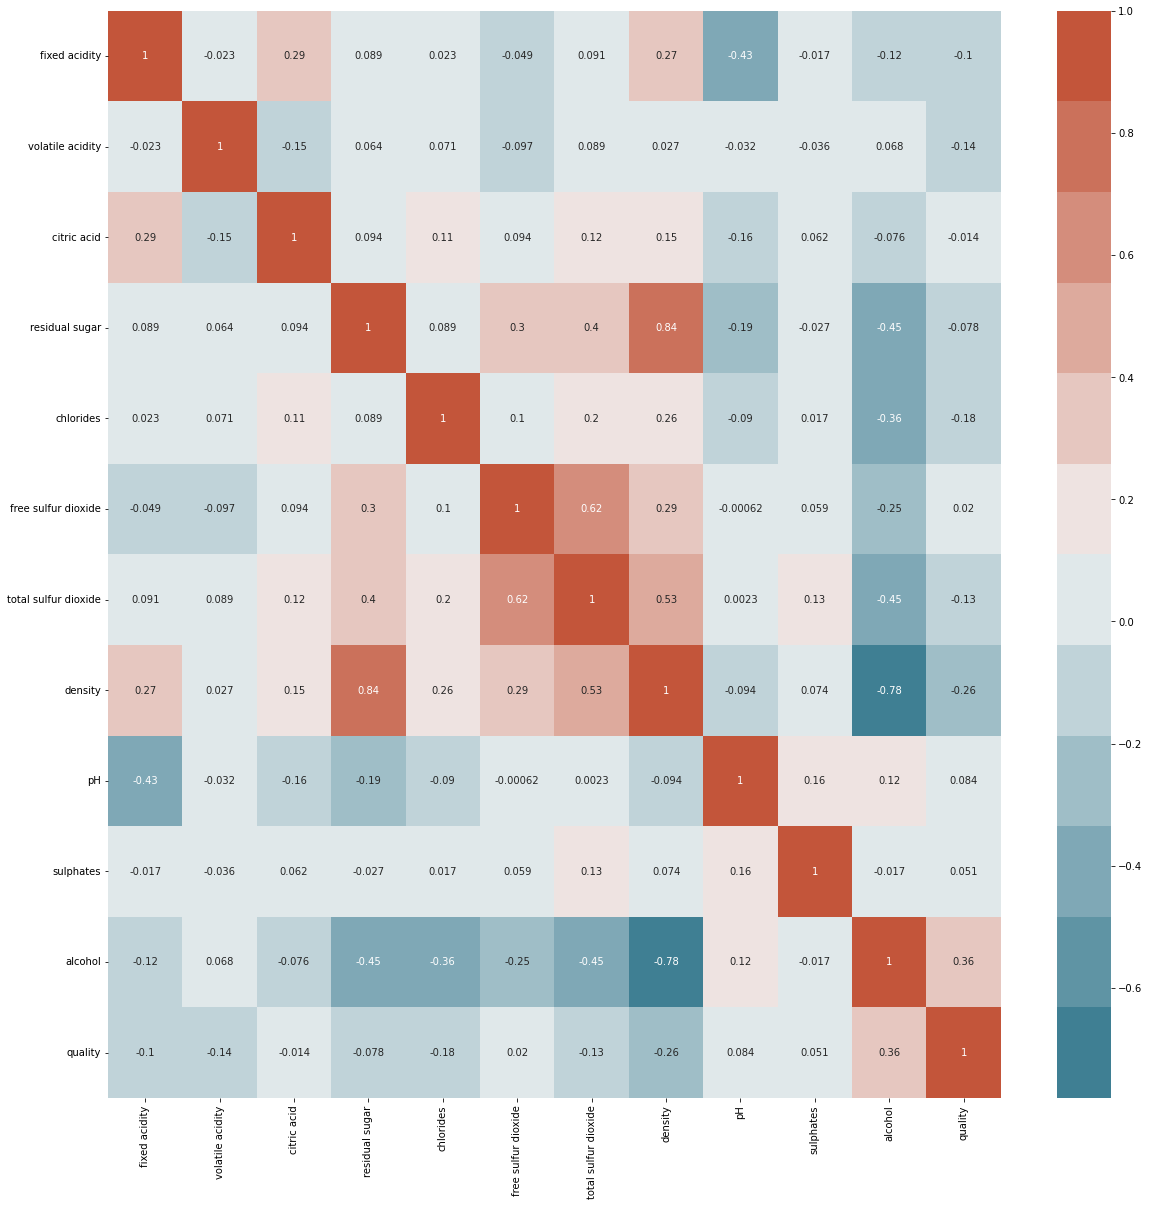

In [11]:
df = pd.read_csv('winequality-preprocess.csv')
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.show()

In [12]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [13]:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Tuning Parameter: we use f1_weighted as performing metric

In [14]:
def best_parameter(param_grid, estimator):
    #fit on the dataset on all parameter combinations in param_grid 
    #retain the best conbination 
    #because our data is unbalanced data, we use f1_weighted
    grid_search = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'f1_weighted')
    #Train model while tuning the parameters using grid search 
    grid_result = grid_search.fit(x_train, y_train)
    #display the best parameter c value 
    print(grid_result.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    return grid_search

In [15]:
def validation(estimator):
    #train model 
    estimator.fit(x_train, y_train)

    #predict the target for the test dataset 
    test_predict = estimator.predict(x_test)

    print(estimator.__class__)

    scores = cross_val_score(estimator, x_train, y_train, cv =5, scoring = 'f1_weighted')
    print("f1_weighted(validation) = ", scores.mean())
    
    #compute the model f1_weighted on the development set: How often is the classifier correct?
    print("f1_weighted(test):{}".format(metrics.f1_score(y_test, test_predict, average='weighted')))

    #print confusion matrix
    print(confusion_matrix(y_test, test_predict))

    #print precision, recall and f1 
    print(classification_report(y_test, test_predict))

## 1.1 K-Nearest Neighbors

In [16]:
validation(KNeighborsClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.7770169633074812
f1_weighted(test):0.73810698786335
[[  5  52   3]
 [  5 631  68]
 [  0 106 110]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        60
           1       0.80      0.90      0.85       704
           2       0.61      0.51      0.55       216

    accuracy                           0.76       980
   macro avg       0.64      0.50      0.51       980
weighted avg       0.74      0.76      0.74       980



In [17]:
#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

In [ ]:
validation(KNeighborsClassifier(n_neighbors=11, p=1, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980



## 1.2 Decision Tree

In [ ]:
validation(DecisionTreeClassifier())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.784510702034665
f1_weighted(test):0.7267058658944483
[[ 10  46   4]
 [ 19 592  93]
 [  6  92 118]]
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        60
           1       0.81      0.84      0.83       704
           2       0.55      0.55      0.55       216

    accuracy                           0.73       980
   macro avg       0.55      0.52      0.53       980
weighted avg       0.72      0.73      0.73       980



In [ ]:
#the param_grid specifies one grid should be explored 
param_grid = {"criterion":["gini", "entropy"], 
              "splitter" : ["best", "random"], 
              "max_depth":[7, 8, 9, 10, 11, 12, 13, 14, None]}

best_parameter(param_grid, DecisionTreeClassifier())

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.7824260881611718
DecisionTreeClassifier(criterion='entropy')


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, None],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [ ]:
validation(DecisionTreeClassifier(criterion='entropy'))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7844156635690783
f1_weighted(test):0.743214086699022
[[  9  46   5]
 [ 17 604  83]
 [  1  89 126]]
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        60
           1       0.82      0.86      0.84       704
           2       0.59      0.58      0.59       216

    accuracy                           0.75       980
   macro avg       0.58      0.53      0.54       980
weighted avg       0.74      0.75      0.74       980



## 1.3 SVM

In [ ]:
validation(SVC())

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7569532661622315
f1_weighted(test):0.7083401182418172
[[  0  60   0]
 [  0 675  29]
 [  0 147  69]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.77      0.96      0.85       704
           2       0.70      0.32      0.44       216

    accuracy                           0.76       980
   macro avg       0.49      0.43      0.43       980
weighted avg       0.70      0.76      0.71       980



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
#the param_grid specifies one grid should be explored 
param_grid = {"C":[1, 10, 100, 1000]}

#fit on the dataset on all parameter combinations in param_grid 
#retain the best conbination 
best_parameter(param_grid, SVC(kernel = 'linear'))

{'C': 100}
0.7570448721915268
SVC(C=100, kernel='linear')


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 100, 1000]}, scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'degree':[1,2,3,4,5]}
best_parameter(param_grid, SVC(kernel = 'poly'))

{'C': 10, 'degree': 5}
0.7463614718295586
SVC(C=10, degree=5, kernel='poly')


GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5]},
             scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto']}
best_parameter(param_grid, SVC(kernel = 'rbf'))

{'C': 1, 'gamma': 0.5}
0.7701258899347325
SVC(C=1, gamma=0.5)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto'], 
               "coef0":[0,1,10]}
best_parameter(param_grid, SVC(kernel = 'sigmoid'))

{'C': 1, 'coef0': 0, 'gamma': 0.1}
0.7318200285934926
SVC(C=1, coef0=0, gamma=0.1, kernel='sigmoid')


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10, 100, 1000], 'coef0': [0, 1, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [ ]:
validation(SVC(C=1, gamma=0.5))

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7919818954975618
f1_weighted(test):0.7469330871547311
[[  2  58   0]
 [  0 672  32]
 [  0 121  95]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        60
           1       0.79      0.95      0.86       704
           2       0.75      0.44      0.55       216

    accuracy                           0.78       980
   macro avg       0.85      0.48      0.49       980
weighted avg       0.79      0.78      0.75       980



# Experiment Set 1: conclusion

obviously KNN is the best performing model, which has the highest weighted f1-score


# Experiment Set 2:  Select Features

# Experiment Set 3:  Ensemble Learning


In [1]:
# Standard Python libraries
import pandas as pd                  # Use pandas.DataFrame to manipulate data
import matplotlib.pyplot as plt      # Standard plotting library
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing
from sklearn import preprocessing    # Data preprocessing

# Model selection - split data, cv, model evaluation
from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.model_selection import cross_val_score     # k-fold cross-validation
from sklearn.model_selection import GridSearchCV        # search for best parameters
from sklearn import metrics                             # metrics to evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix    # analyze prediction made by the classification model

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Feature extraction - Decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# Ensemble learning methods
from sklearn.ensemble import BaggingClassifier            # Bagging - (B)ootstrap (AGG)regat(ING)
from sklearn.ensemble import AdaBoostClassifier           # Boosting - (ADA)ptive (BOOST)ing
from sklearn.ensemble import VotingClassifier             # Voting

# Itertools - here, used to generate combinations of base classifiers for voting
import itertools
# Silence all war


from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('winequality-preprocess.csv')

In [3]:
# Indicate the target column
target = df['quality']
# Indicate the columns that will serve as features
features = df.drop('quality', axis = 1)
features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [5]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [6]:
# Helper function #1: train and evaluate model performance.
# - The parameter `estimator` takes a list of classifier dictionary: {name, classifier}
def train_and_evaluate(estimators, X_train, X_test, Y_train, Y_test):
    # Nested function #1: Specify performance metric: only "f1_macro"
    def get_scoring_metric():
        return ['f1_macro']
    
    # Nested function #2: K-fold cross validation
    def print_validation_performance(estimator, X_train, Y_train, name=None, cv=10):
        for metric in get_scoring_metric():
            scores = cross_val_score(estimator, X_train, Y_train, cv=cv, scoring=metric)
            estimator_name = ""
            
            if name is not None:
                estimator_name = " {}".format(name)
                
            print("{} (Validation{}) = ".format(metric, estimator_name), end="")
            print("{:.4f}".format(scores.mean()))
    
    # Nested function #3: Training and testing
    def print_test_performance(estimator, X_train, X_test, Y_train, Y_test, name=None):
        estimator.fit(X_train, Y_train)
        test_predict = estimator.predict(X_test)
        dict_score = {}
        # Get performance score for each metric
        for metric in get_scoring_metric():
            estimator_name = ""
            score = 0.0
            
            if name is not None:
                estimator_name = " {}".format(name) 
            
            average = None
            acc_flag = True
            
            if "macro" in metric:
                average = "macro"
                acc_flag = False
            elif "weighted" in metric:
                average = "weighted"
                acc_flag = False
            
            print("{} (Test{}) = ".format(metric, estimator_name), end="")
            
            # Currently only supports accuracy and f1_score.
            if acc_flag:
                score = metrics.accuracy_score(Y_test, test_predict)
            else:
                score = metrics.f1_score(Y_test, test_predict, average=average)
            
            print("{:.4f}".format(score)) 
            dict_score[metric] = score
        
        print(confusion_matrix(Y_test, test_predict))         # Confusion matrix
        print(classification_report(Y_test, test_predict))    # Classification report
        
        return dict_score
    
    dict_est_score = {}
    
    # Print validation and test performance for all classifiers in the list.
    for key_est in estimators:
        print_validation_performance(estimators[key_est], X_train, Y_train, name=key_est)
        dict_est_score[key_est] = print_test_performance(estimators[key_est], 
                                                         X_train, X_test, Y_train, Y_test, 
                                                         name=key_est)
        print()
        
    return dict_est_score

In [7]:
dict_clf_default = {
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Linear SVM": SVC(kernel='linear', max_iter=1500), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=1500), 
    "RBF SVM": SVC(kernel='rbf', max_iter=1500), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=1500),
    "Logistic Regression": LogisticRegression()
    }

In [8]:
# Specify one classifier
clf_index = 1

estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = {estimator_name: dict_clf_default[estimator_name]}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Decision Tree) = 0.5872
f1_macro (Test Decision Tree) = 0.6031
[[ 11  17   2]
 [ 33 596  94]
 [  1  65 161]]
              precision    recall  f1-score   support

           0       0.24      0.37      0.29        30
           1       0.88      0.82      0.85       723
           2       0.63      0.71      0.67       227

    accuracy                           0.78       980
   macro avg       0.58      0.63      0.60       980
weighted avg       0.80      0.78      0.79       980




{'Decision Tree': {'f1_macro': 0.6031478105957374}}

f1_macro (Validation K-Nearest Neighbors) = 0.4604
f1_macro (Test K-Nearest Neighbors) = 0.4928
[[  5  22   3]
 [ 10 641  72]
 [  2 143  82]]
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        30
           1       0.80      0.89      0.84       723
           2       0.52      0.36      0.43       227

    accuracy                           0.74       980
   macro avg       0.54      0.47      0.49       980
weighted avg       0.72      0.74      0.72       980



f1_macro (Validation Decision Tree) = 0.5872
f1_macro (Test Decision Tree) = 0.6031
[[ 11  17   2]
 [ 33 596  94]
 [  1  65 161]]
              precision    recall  f1-score   support

           0       0.24      0.37      0.29        30
           1       0.88      0.82      0.85       723
           2       0.63      0.71      0.67       227

    accuracy                           0.78       980
   macro avg       0.58      0.63      0.60       980
weighted avg       

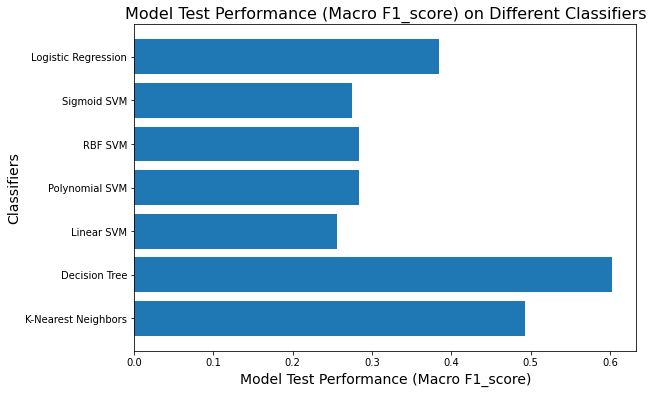

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.492769
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.603148
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.256061
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.283030
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.283030
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.274209
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.384933


In [9]:

# Baseline - compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

# Generating results
# ---
# Iterate through all classifiers
for clf in dict_clf_default:
    estimator = { clf: dict_clf_default[clf] }
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
        
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())

    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_default.csv', index = False, hea

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("{} on Different Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Classifiers", fontsize=(font_size + 2))

plt.show()
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance.to_csv(r'final_project_performance_baseline_{}clf.csv'.format(3), index = False, header = True)

df_performance

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_default.png", dpi=300, bbox_inches="tight")

## 3.1Bagging

In [10]:
# Specify classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for BaggingClassifier object
base = list(dict_clf_default.values())[clf_index]
bagging_param = dict(base_estimator=base,
                     n_estimators=100,    # create 100 different models using the same `base_estimator`
                     random_state=0)

# Define BaggingClassifier object
model_bagging = BaggingClassifier(**bagging_param)

estimator_name = "Bagging - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_bagging}

# Train and evaluate the performance of the bagging classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Bagging - Decision Tree) = 0.6298
f1_macro (Test Bagging - Decision Tree) = 0.6435
[[  6  24   0]
 [  6 682  35]
 [  0  74 153]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        30
           1       0.87      0.94      0.91       723
           2       0.81      0.67      0.74       227

    accuracy                           0.86       980
   macro avg       0.73      0.61      0.64       980
weighted avg       0.85      0.86      0.85       980




{'Bagging - Decision Tree': {'f1_macro': 0.6435273266815003}}

f1_macro (Validation K-Nearest Neighbors) = 0.4548
f1_macro (Test K-Nearest Neighbors) = 0.4996
[[  4  24   2]
 [  5 652  66]
 [  0 142  85]]
              precision    recall  f1-score   support

           0       0.44      0.13      0.21        30
           1       0.80      0.90      0.85       723
           2       0.56      0.37      0.45       227

    accuracy                           0.76       980
   macro avg       0.60      0.47      0.50       980
weighted avg       0.73      0.76      0.73       980



f1_macro (Validation Decision Tree) = 0.6298
f1_macro (Test Decision Tree) = 0.6435
[[  6  24   0]
 [  6 682  35]
 [  0  74 153]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        30
           1       0.87      0.94      0.91       723
           2       0.81      0.67      0.74       227

    accuracy                           0.86       980
   macro avg       0.73      0.61      0.64       980
weighted avg       

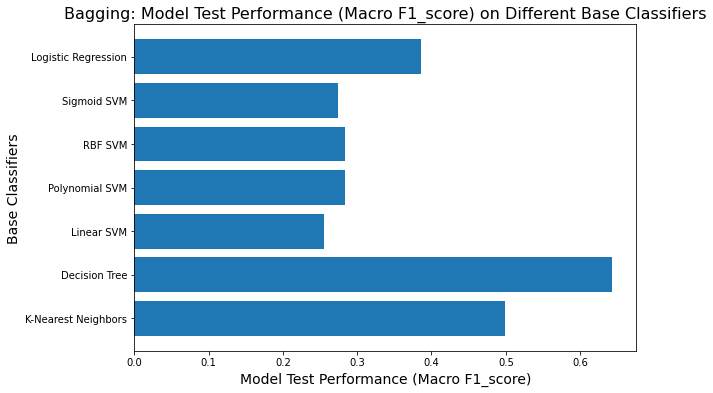

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.499567
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.643527
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.255999
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.283030
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.283030
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.274563
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.385578


In [11]:
# Bagging - compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

bagging_param = dict(n_estimators=100, random_state=0)


# Generate results
# ---
# Iterate through all classifiers
for i, clf in enumerate(dict_clf_default):
    base = dict_clf_default[clf]
    
    params = bagging_param.copy()
    params["base_estimator"] = base

    model_bagging = BaggingClassifier(**params)
    
    estimator = { clf: model_bagging }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())
    # Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_bagging.csv', index = False, header = True)


# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Bagging: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()






# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance.to_csv(r'final_project_performance_bagging_{}clf.csv'.format(3), index = False, header = True)

df_performance
# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_bagging.png", dpi=300, bbox_inches="tight")

## 3.2 boosting

In [12]:
_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default)]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Linear SVM
Index: 3 - Polynomial SVM
Index: 4 - RBF SVM
Index: 5 - Sigmoid SVM
Index: 6 - Logistic Regression


In [13]:
# Specify one classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for AdaBoostClassifier object
base = list(dict_clf_default.values())[clf_index]
boosting_param = dict(base_estimator=base,
                     n_estimators=100,
                     random_state=0)

# Define AdaBoostClassifier object
model_boosting = AdaBoostClassifier(**boosting_param)

estimator_name = "Boosting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the AdaBoost classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_macro (Validation Boosting - Decision Tree) = 0.5836
f1_macro (Test Boosting - Decision Tree) = 0.5901
[[ 11  18   1]
 [ 32 581 110]
 [  1  68 158]]
              precision    recall  f1-score   support

           0       0.25      0.37      0.30        30
           1       0.87      0.80      0.84       723
           2       0.59      0.70      0.64       227

    accuracy                           0.77       980
   macro avg       0.57      0.62      0.59       980
weighted avg       0.79      0.77      0.77       980




{'Boosting - Decision Tree': {'f1_macro': 0.5901217648374762}}

In [14]:
# SVM Boosting 
clf_index = 2    # Accepts value from 0 - 6

# Define parameter values for AdaBoostClassifier object
base = list(dict_clf_default.values())[clf_index]
boosting_param = dict(base_estimator=base,
                     n_estimators=100,
                     algorithm='SAMME',random_state=0)

# Define AdaBoostClassifier object
model_boosting = AdaBoostClassifier(**boosting_param)
#model_boosting = AdaBoostClassifier((svm.SVC(probability=True,kernel='linear'),n_estimators=50,learning_rate=1.0,algorithm='SAMME')

estimator_name = "Boosting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the AdaBoost classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Boosting - Linear SVM) = 0.2854
f1_macro (Test Boosting - Linear SVM) = 0.2830
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980




{'Boosting - Linear SVM': {'f1_macro': 0.28302994715208457}}

- K-Nearest Neighbors
f1_macro (Validation K-Nearest Neighbors) = 0.2854
f1_macro (Test K-Nearest Neighbors) = 0.2830
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980



- Decision Tree
f1_macro (Validation Decision Tree) = 0.2854
f1_macro (Test Decision Tree) = 0.2830
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33  

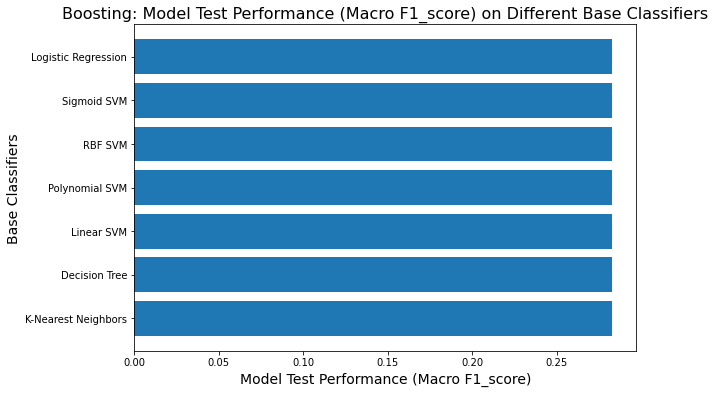

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.28303


In [15]:
# Compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test

# Initialize parameter values of boosting classifier
boosting_param = dict(n_estimators=100,random_state=0)

# Loop through all classifiers
# ---
for i, clf in enumerate(dict_clf_default):
    print("- {}".format(clf))
    base = dict_clf_default[clf]
    
    if i<1:
        params = boosting_param.copy()
    else:
        params = dict(n_estimators=100,algorithm='SAMME',random_state=0)
    
    params["base_estimator"] = base
    
    
    estimator = { clf: model_boosting }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
    
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())
    # Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_boosting.csv', index = False, header = True)

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Boosting: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()

##Save plot into PNG (optional) 
##plt.savefig("final_project_performance_boosting.png", dpi=300, bbox_inches="tight")
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance.to_csv(r'final_project_performance_boosting_{}clf.csv'.format(3), index = False, header = True)

df_performance
    

## 3.3 Voting

In [16]:
score_param = "f1_score"
average_param = "macro"

# specify number of base classifiers
num_base_clf = 3                                # Accepts values from 2 - 4 (number of base classifiers)
list_clf = [[] for i in range(num_base_clf)]    # 2-dimensional list, to store list of classifiers in
                                                # each voting classifier
list_score = []

# Generate all possible combinations of base classifiers with # of classifiers = num_base_clf
# ---
# For example: if num_base_clf = 3, 
# [A, B, C, D] -> [A, B, C], [A, B, D], [A, C, D] and [B, C, D]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

# Iterate through all generated lists
for comb in combinations_base_clf:
    list_base_clf = []
    
    # Return number of SVM classifiers in a list
    count_svm = sum("SVM" in clf for clf in comb)    
    
    # At most one SVM classifier in the list.
    # - skip all the lists with >1 classifiers - speed up iteration
    # - ensure variation in machine learning algorithms in the voting classifier
    if count_svm <= 1:
        for i, clf in enumerate(comb):
            list_base_clf.append((clf, dict_clf_default[clf]))
            list_clf[i].append(clf)
    
        print(comb)
        print("---")
        
        try:
            model_voting = VotingClassifier(estimators=list_base_clf)
            estimator_name = "Voting Classifier"
            estimator = { estimator_name : model_voting }
            score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
            
            list_score = list_score + list(score[estimator_name].values())
            
        except Exception as e:
            error_class_name = e.__class__.__name__
            print("{}: {}\n".format(error_class_name, e))
            continue
        
        print()

        
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance.to_csv(r'final_project_performance_voting_{}clf.csv'.format(3), index = False, header = True)

df_performance
            

('K-Nearest Neighbors', 'Decision Tree', 'Linear SVM')
---
f1_macro (Validation Voting Classifier) = 0.4786
f1_macro (Test Voting Classifier) = 0.4594
[[ 11  17   2]
 [107 591  25]
 [ 75  80  72]]
              precision    recall  f1-score   support

           0       0.06      0.37      0.10        30
           1       0.86      0.82      0.84       723
           2       0.73      0.32      0.44       227

    accuracy                           0.69       980
   macro avg       0.55      0.50      0.46       980
weighted avg       0.80      0.69      0.72       980



('K-Nearest Neighbors', 'Decision Tree', 'Polynomial SVM')
---
f1_macro (Validation Voting Classifier) = 0.4560
f1_macro (Test Voting Classifier) = 0.4917
[[  3  25   2]
 [  2 705  16]
 [  0 160  67]]
              precision    recall  f1-score   support

           0       0.60      0.10      0.17        30
           1       0.79      0.98      0.87       723
           2       0.79      0.30      0.43       227

 

,classifier_0,classifier_1,classifier_2,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,0.459359
1,K-Nearest Neighbors,Decision Tree,Polynomial SVM,0.491688
2,K-Nearest Neighbors,Decision Tree,RBF SVM,0.491688
3,K-Nearest Neighbors,Decision Tree,Sigmoid SVM,0.508569
4,K-Nearest Neighbors,Decision Tree,Logistic Regression,0.514872
5,K-Nearest Neighbors,Linear SVM,Logistic Regression,0.368928
6,K-Nearest Neighbors,Polynomial SVM,Logistic Regression,0.340093
7,K-Nearest Neighbors,RBF SVM,Logistic Regression,0.340093
8,K-Nearest Neighbors,Sigmoid SVM,Logistic Regression,0.371355
9,Decision Tree,Linear SVM,Logistic Regression,0.409627


In [17]:
# voting 继承学习
from sklearn.ensemble import RandomForestClassifier
clf_index = 1    # Accepts value from 0 - 6

log = LogisticRegression()
rnd = RandomForestClassifier()
svm = SVC()


# Define VotingClassifier object
model_boosting = VotingClassifier(estimators=[('lr',log), ('rf',rnd), ('svm',svm)],voting='hard')

estimator_name = "Voting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the Voting classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_macro (Validation Voting - Decision Tree) = 0.3655
f1_macro (Test Voting - Decision Tree) = 0.3896
[[  0  30   0]
 [  1 711  11]
 [  0 184  43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.77      0.98      0.86       723
           2       0.80      0.19      0.31       227

    accuracy                           0.77       980
   macro avg       0.52      0.39      0.39       980
weighted avg       0.75      0.77      0.71       980




{'Voting - Decision Tree': {'f1_macro': 0.3896379665779866}}

In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

## 3.4 stacking

Stacking-single

In [19]:
# Define StackingClassifier object
estimators = [ ('rf', RandomForestClassifier(random_state=42)),
             ('nk',KNeighborsClassifier())]

model_boosting = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

estimator_name = "Stacking - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the Voting classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_macro (Validation Stacking - Decision Tree) = 0.6076
f1_macro (Test Stacking - Decision Tree) = 0.6628
[[  7  23   0]
 [  6 686  31]
 [  0  72 155]]
              precision    recall  f1-score   support

           0       0.54      0.23      0.33        30
           1       0.88      0.95      0.91       723
           2       0.83      0.68      0.75       227

    accuracy                           0.87       980
   macro avg       0.75      0.62      0.66       980
weighted avg       0.86      0.87      0.86       980




{'Stacking - Decision Tree': {'f1_macro': 0.6628069215928473}}

In [20]:
dict_clf_default = {
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Linear SVM": SVC(kernel='linear', max_iter=1500), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=1500), 
    "RBF SVM": SVC(kernel='rbf', max_iter=1500), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=1500),
    "Logistic Regression": LogisticRegression()
    }

Stacking- three random group

In [21]:
score_param = "f1_score"
average_param = "macro"

# specify number of base classifiers
num_base_clf = 3                                # Accepts values from 2 - 4 (number of base classifiers)
list_clf = [[] for i in range(num_base_clf)]    # 2-dimensional list, to store list of classifiers in
                                                # each voting classifier
list_score = []

# For example: if num_base_clf = 3, 
# [A, B, C, D] -> [A, B, C], [A, B, D], [A, C, D] and [B, C, D]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

nameList=[]
listAll=[]
for comb in combinations_base_clf:
    nameList.append(comb)
    list1=[]
    for name in comb:
       
        list1.append((name, dict_clf_default.get(name)))
    listAll.append(list1)

# Iterate through all generated lists
i=0
for comb in listAll:
    print(nameList[i])
    print("---")
    i+=1
    try:
        model_voting = StackingClassifier(estimators=comb, final_estimator=LogisticRegression())
        estimator_name = "Stacking Classifier"
        estimator = { estimator_name : model_voting }
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

        list_score = list_score + list(score[estimator_name].values())

    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue

    print("------------------------------------------------------------------------------")

        


('K-Nearest Neighbors', 'Decision Tree', 'Linear SVM')
---
f1_macro (Validation Stacking Classifier) = 0.5141
f1_macro (Test Stacking Classifier) = 0.5287
[[  2  26   2]
 [  3 672  48]
 [  0 110 117]]
              precision    recall  f1-score   support

           0       0.40      0.07      0.11        30
           1       0.83      0.93      0.88       723
           2       0.70      0.52      0.59       227

    accuracy                           0.81       980
   macro avg       0.64      0.50      0.53       980
weighted avg       0.79      0.81      0.79       980


------------------------------------------------------------------------------
('K-Nearest Neighbors', 'Decision Tree', 'Polynomial SVM')
---
f1_macro (Validation Stacking Classifier) = 0.5145
f1_macro (Test Stacking Classifier) = 0.5735
[[  3  25   2]
 [  3 668  52]
 [  0  87 140]]
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        30
           1       0.86 

In [22]:
# Create data frame
# ---
for comb in nameList:
    for i, clf in enumerate(comb):
                list_base_clf.append((clf, dict_clf_default[clf]))
                list_clf[i].append(clf)

            
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance1 = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance1.to_csv(r'final_project_performance_stacking_{}clf.csv'.format(3), index = False, header = True)

df_performance1
            

,classifier_0,classifier_1,classifier_2,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,0.528684
1,K-Nearest Neighbors,Decision Tree,Polynomial SVM,0.573546
2,K-Nearest Neighbors,Decision Tree,RBF SVM,0.579892
3,K-Nearest Neighbors,Decision Tree,Sigmoid SVM,0.564552
4,K-Nearest Neighbors,Decision Tree,Logistic Regression,0.564217
5,K-Nearest Neighbors,Linear SVM,Polynomial SVM,0.424029
6,K-Nearest Neighbors,Linear SVM,RBF SVM,0.430156
7,K-Nearest Neighbors,Linear SVM,Sigmoid SVM,0.377404
8,K-Nearest Neighbors,Linear SVM,Logistic Regression,0.400565
9,K-Nearest Neighbors,Polynomial SVM,RBF SVM,0.434663


# Experiment Set 4: Vary Training Sample Size
